<a href="https://colab.research.google.com/github/souravs17031999/Projects-kaggle-problems-60daysofudacity/blob/master/Data_cleaning_complete_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting ratings

### Walking through the directory to find file paths

In [0]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/orion19-datathon/Orion'19_Datathon_data_freshmen/user_reviews_train.csv
/kaggle/input/orion19-datathon/Orion'19_Datathon_data_freshmen/sample_submission.csv
/kaggle/input/orion19-datathon/Orion'19_Datathon_data_freshmen/test.csv
/kaggle/input/orion19-datathon/Orion'19_Datathon_data_freshmen/google_play_store_train.csv


### Importing packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Loading files

In [0]:
df_train = pd.read_csv("/kaggle/input/orion19-datathon/Orion'19_Datathon_data_freshmen/google_play_store_train.csv")
df_test = pd.read_csv("/kaggle/input/orion19-datathon/Orion'19_Datathon_data_freshmen/test.csv")

### Investigating data shapes and values (overview)

In [0]:
df_train.shape

(10474, 15)

In [0]:
df_test.shape

(367, 14)

In [0]:
df_train.head()

,App_ID,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 14
0,10,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,15,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,20,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,25,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,30,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,Creativity,"June 20, 2018",1.1,4.4 and up


### Data preprocessing

Following steps will be followed :
* firstly check for all NaN/ Null values and replacing it appropriately
* Then i will go for converting categorical variables to numerical values by substituting dummy variables
* Then i will drop irrelevant columns (These are existing in this dataset due to some irrelevant values in between the rows)
* Then finally all datatypes will be changed to int/float (initially it is 'object' type which is not conveinient for MLmodels)

In [0]:
print(pd.isnull(df_train).sum())
print()
print(pd.isnull(df_test).sum())

App_ID               0
App                  0
Category             0
Rating            1434
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          7
Android Ver          3
Unnamed: 14       9995
dtype: int64

App_ID              0
App                 0
Category            0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         1
Android Ver         0
Unnamed: 13       347
dtype: int64


In [0]:
imputer  = Imputer("NaN", 'mean', 0)
imputer  = imputer.fit(df_train.iloc[:, [3]])
df_train.iloc[:, [3]] = imputer.transform(df_train.iloc[:, [3]])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
df_cancer = df_cancer.replace('?', np.nan)  # useful for replacing some value by some another values

In [0]:
print(pd.isnull(df_train).sum())
print()
print(pd.isnull(df_test).sum())

App_ID               0
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          7
Android Ver          3
Unnamed: 14       9995
dtype: int64

App_ID              0
App                 0
Category            0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         1
Android Ver         0
Unnamed: 13       347
dtype: int64


In [0]:
print(df_train.shape)
print(df_test.shape)

(10474, 15)
(367, 14)


In [0]:
df_train['Type'].value_counts()

Free    9705
Paid     767
0          1
Name: Type, dtype: int64

In [0]:
df_train = df_train.fillna({'Type':'Free'})

In [0]:
df_train['Content Rating'].value_counts()

Everyone           8392
Teen               1189
Mature 17+          482
Everyone 10+        405
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [0]:
df_train = df_train.fillna({'Content Rating' : 'Everyone'})

In [0]:
print(pd.isnull(df_train).sum())
print()
print(pd.isnull(df_test).sum())

App_ID               0
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          7
Android Ver          3
Unnamed: 14       9995
dtype: int64

App_ID              0
App                 0
Category            0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         1
Android Ver         0
Unnamed: 13       347
dtype: int64


In [0]:
ids = df_test['App_ID']

In [0]:
print(df_train.shape)
print(df_test.shape)

(10474, 15)
(367, 14)


In [0]:
df_train.dtypes

App_ID              int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Unnamed: 14        object
dtype: object

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10474 entries, 0 to 10473
Data columns (total 15 columns):
App_ID            10474 non-null int64
App               10474 non-null object
Category          10474 non-null object
Rating            10474 non-null float64
Reviews           10474 non-null object
Size              10474 non-null object
Installs          10474 non-null object
Type              10474 non-null object
Price             10474 non-null object
Content Rating    10474 non-null object
Genres            10474 non-null object
Last Updated      10474 non-null object
Current Ver       10467 non-null object
Android Ver       10471 non-null object
Unnamed: 14       479 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 1.2+ MB


In [0]:
dummy_fields = ['Category', 'Type', 'Content Rating', 'Genres']
for each in dummy_fields:
    dummies = pd.get_dummies(df_train[each], drop_first=False)
    df_train = pd.concat([df_train, dummies], axis=1)

In [0]:
fields_to_drop = ['Category', 'Type', 'Content Rating', 'Genres', 'App_ID', 'App', 'Last Updated', 'Current Ver', 'Android Ver', 'Unnamed: 14']
df_train = df_train.drop(fields_to_drop, axis=1)    

In [0]:
df_train.shape

(10474, 97)

In [0]:
dummy_fields_test = ['Category', 'Type', 'Content Rating', 'Genres']
for each in dummy_fields_test:
    dummies_test = pd.get_dummies(df_test[each], drop_first=False)
    df_test = pd.concat([df_test, dummies_test], axis=1)

In [0]:
fields_to_drop = ['Category', 'Type', 'Content Rating', 'Genres', 'App_ID', 'App', 'Last Updated', 'Current Ver', 'Android Ver', 'Unnamed: 13']
df_test = df_test.drop(fields_to_drop, axis=1)    

In [0]:
df_test.shape

(367, 77)

In [0]:
df_train.Size = [x.strip('M') for x in df_train.Size]

In [0]:
df_train.Size = [x.strip('k') for x in df_train.Size]

In [0]:
df_train.Installs = [x.strip('+') for x in df_train.Installs]

In [0]:
df_train.Price = [x.strip('$') for x in df_train.Price]

In [0]:
df_train.Installs = [x.replace(',', "") for x in df_train.Installs]

In [0]:
df_test.Size = [x.strip('M') for x in df_test.Size]
df_test.Size = [x.strip('k') for x in df_test.Size]
df_test.Installs = [x.strip('+') for x in df_test.Installs]
df_test.Price = [x.strip('$') for x in df_test.Price]
df_test.Installs = [x.replace(',', "") for x in df_test.Installs]

In [0]:
l = []
for i in df_train.columns:
  if i not in df_test.columns:
    l.append(i)

In [0]:
l.remove('Rating')
l   

['1.9',
 'COMICS',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'LIBRARIES_AND_DEMO',
 'PARENTING',
 '0',
 'Adults only 18+',
 'Unrated',
 'Casino',
 'Comics',
 'Events',
 'February 11, 2018',
 'Libraries & Demo',
 'Music & Audio',
 'Parenting',
 'Trivia',
 'Word']

In [0]:
fields_to_drop_new = l
df_train = df_train.drop(fields_to_drop_new, axis=1) 

In [0]:
df_train.shape 

(10474, 78)

In [0]:
df_test.shape

(367, 77)

In [0]:
df_train = df_train[df_train.Reviews != '3.0M']


In [0]:
df_train = df_train[df_train.Size != 'Varies with device']

In [0]:
df_train = df_train.astype({"Reviews":'float64', "Size":'float64'}) 

In [0]:
df_train = df_train.astype({"Reviews":'int64', "Size":'int64'}) 

In [0]:
df_train = df_train.astype({"Installs":'float64', "Price":'float64'}) 

In [0]:
df_train = df_train.astype({"Installs":'int64', "Price":'int64'}) 

In [0]:
df_test["Size"]= df_test["Size"].replace('Varies with device', 0)

In [0]:
df_test = df_test.astype({"Reviews":'float64'}) 

In [0]:
df_test = df_test.astype({"Reviews":'int64'}) 

In [0]:
df_test = df_test.astype({"Installs":'int64', "Price":'float64'}) 

In [0]:
df_test = df_test.astype({"Installs":'int64', "Price":'int64'}) 

In [0]:
df_test = df_test.astype({"Size":'float64'}) 

In [0]:
df_test = df_test.astype({"Size":'int64'}) 

In [0]:
df_test["Size"]= df_test["Size"].replace(0, df_test['Size'].mean())


In [0]:
df_train.head()

,Rating,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Video Players & Editors,Weather
0,4.1,159,19,10000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14,500000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8,5000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25,50000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2,100000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df_test.head()

,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMMUNICATION,...,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Video Players & Editors,Weather
0,13791,33.0,1000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,121,3.0,10000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13880,28.0,1000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8788,12.0,1000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44829,20.0,10000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Fetching actual features and targets on which ML model is to be trained

In [0]:
X = df_train.iloc[:, 1:]

In [0]:
X.head()

,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMMUNICATION,...,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Video Players & Editors,Weather
0,159,19,10000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14,500000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8,5000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25,50000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2,100000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y = df_train['Rating']

### Applying regression models on dataset

In [0]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X.shape

(8810, 77)

In [0]:
y.shape

(8810,)

In [0]:
y_test = df_test.iloc[:, :]

In [0]:
y_test.shape

(367, 77)

In [0]:
y_pred = reg.predict(y_test)

In [0]:
ids.shape

(367,)

In [0]:
y_pred.shape

(367,)

### Checking values of coefficients

In [0]:
coeff = pd.DataFrame(X.columns)
coeff['Coefficient Estimate'] = pd.Series(reg.coef_)

In [0]:
print(coeff)

                          0  Coefficient Estimate
0                   Reviews          1.930019e-08
1                      Size         -1.038932e-04
2                  Installs          2.535740e-11
3                     Price         -6.550652e-04
4            ART_AND_DESIGN         -2.739959e-02
..                      ...                   ...
72                 Strategy         -6.386694e-03
73                    Tools         -1.019039e-01
74           Travel & Local         -9.958017e-02
75  Video Players & Editors         -1.247003e-01
76                  Weather         -1.174244e-02

[77 rows x 2 columns]


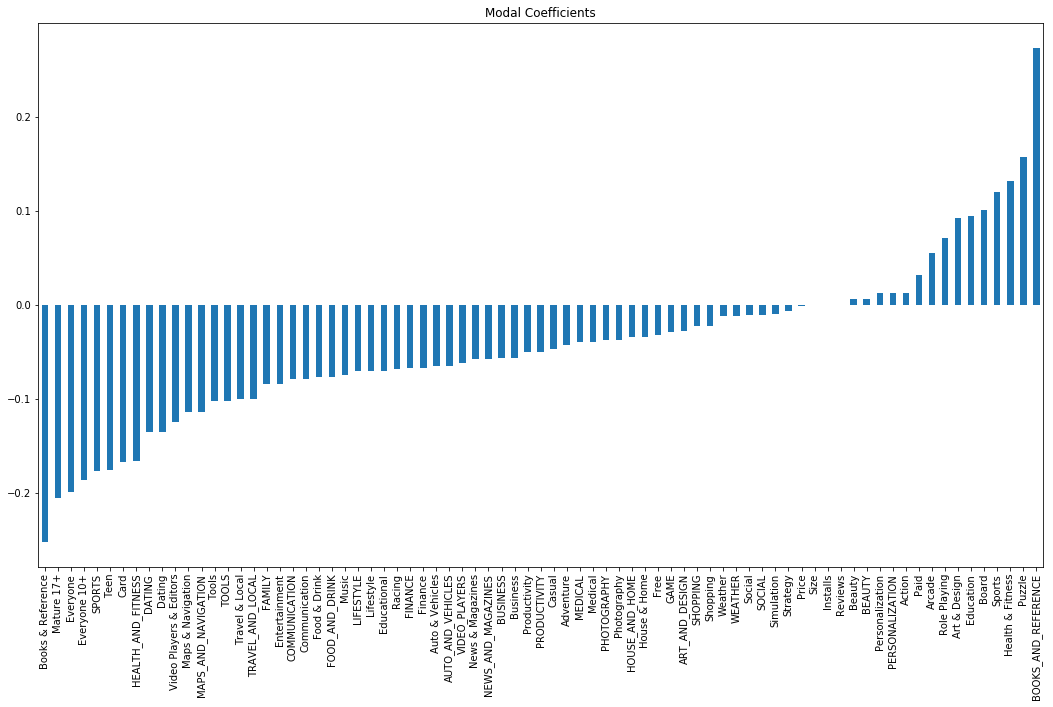

In [0]:
predictors = X.columns
coef = pd.Series(reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients', figsize=(18,10))

### converting output to dataframe

In [0]:
output = pd.DataFrame({ 'App_ID' : ids, 'Rating': y_pred})

In [0]:
output.head()

,App_ID,Rating
0,50,4.320600
1,55,4.323428
2,60,4.321121
3,65,4.322685
4,70,4.345351


In [0]:
output['Rating'] = [round(x, 1) for x in output['Rating']]

In [0]:
output.head()

,App_ID,Rating
0,50,4.3
1,55,4.3
2,60,4.3
3,65,4.3
4,70,4.3


In [0]:
output.to_csv('output.csv', index=False)

## PLotting graphs EDA

## Data visualization and finding patterns/correlations

## First of all , let's investigate balancing of dataset samples

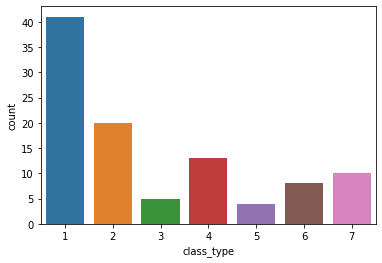

In [0]:
sns.countplot(df['class_type'])

In [0]:
df.columns[:16]

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

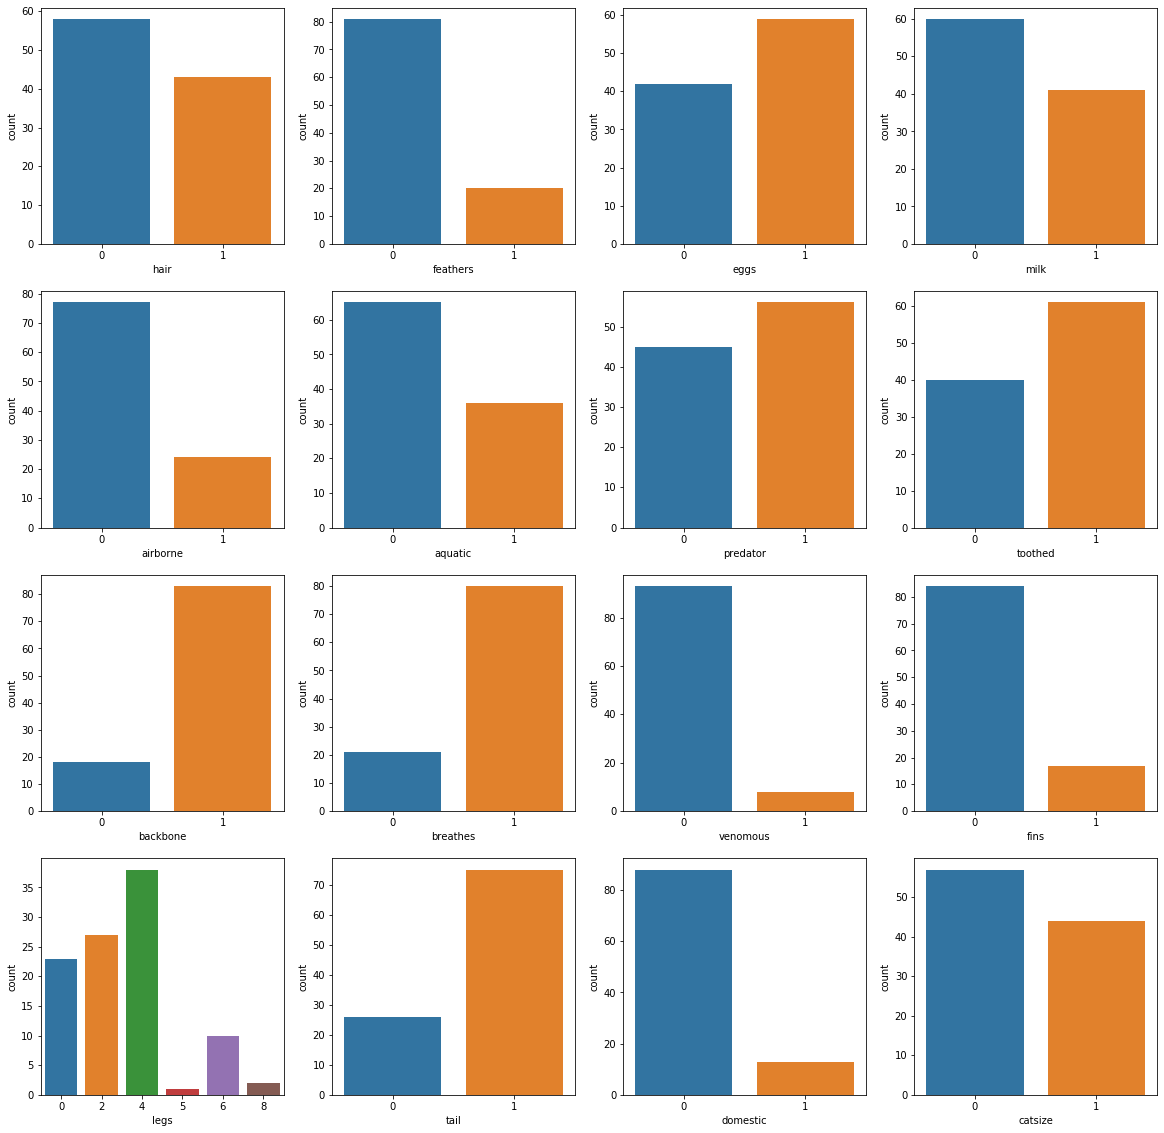

In [0]:
# investigate counts of unique values for each columns in dataframe
fig, ax =plt.subplots(4,4, figsize=(20, 20))
k = 0
for i in range(0, 4):
  for j in range(0, 4):
    sns.countplot(df[df.columns[k]], ax = ax[i][j])
    k += 1
fig.show()

## investigating the distribution of data 

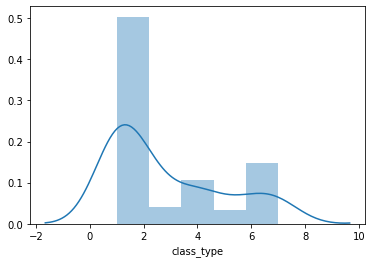

In [0]:
sns.distplot(df['class_type'])

## analyzing heatmaps !

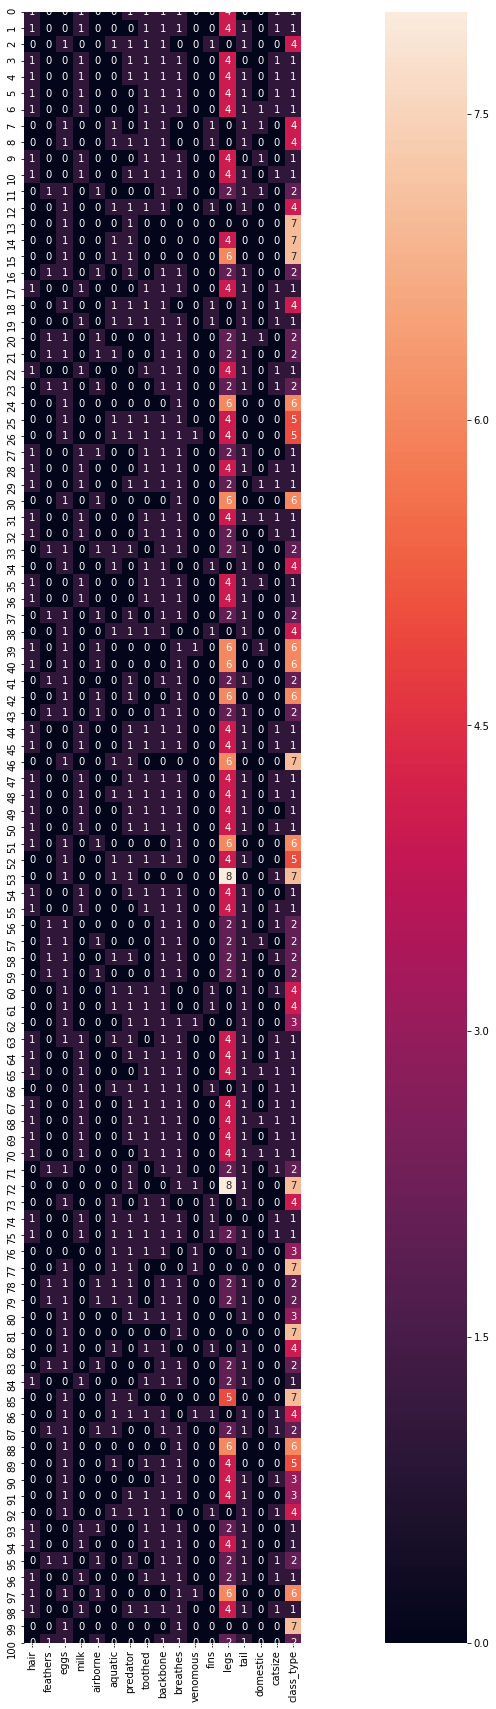

In [0]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df, square = True, annot = True)